## Aquisição e leitura dos dados

In [1]:
# Carregando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Leitura dos dados
df = pd.read_csv('vinhos.csv')

## Análise exploratória

In [3]:
#Lista do nome e do tipo das colunas
df.dtypes

acidez_fixa                     float64
acidez_volatil                  float64
acido_citrico                   float64
concentracao_residual_acucar    float64
cloretos                        float64
dioxido_de_enxofre_livre        float64
dioxido_de_enxofre_total        float64
densidade                       float64
pH                              float64
sulfatos                        float64
alcool                          float64
qualidade                         int64
tipo                             object
dtype: object

In [4]:
# Observando o número de linhas e colunas da base
df.shape

(3000, 13)

In [5]:
#Linhas iniciais e finais da base
df.head()
df.tail()

,acidez_fixa,acidez_volatil,acido_citrico,concentracao_residual_acucar,cloretos,dioxido_de_enxofre_livre,dioxido_de_enxofre_total,densidade,pH,sulfatos,alcool,qualidade,tipo
2995,6.6,0.310,0.07,1.5,0.033,55.0,144.0,0.99208,3.16,0.42,10.0,5,branco
2996,6.2,0.240,0.27,2.9,0.039,30.0,123.0,0.98959,3.12,0.37,12.8,6,branco
2997,5.1,0.350,0.26,6.8,0.034,36.0,120.0,0.99188,3.38,0.40,11.5,6,branco
2998,8.0,0.450,0.28,10.8,0.051,25.0,157.0,0.99570,3.06,0.47,11.4,7,branco
2999,7.4,0.105,0.34,12.2,0.050,57.0,146.0,0.99730,3.16,0.37,9.0,6,branco


In [6]:
#Explorando as principais estatísticas para variáveis numéricas
df.describe()

,acidez_fixa,acidez_volatil,acido_citrico,concentracao_residual_acucar,cloretos,dioxido_de_enxofre_livre,dioxido_de_enxofre_total,densidade,pH,sulfatos,alcool,qualidade
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,7.575400,0.404197,0.300483,4.510533,0.066739,25.414333,92.187833,0.995376,3.248700,0.572683,10.484184,5.747667
std,1.556448,0.191077,0.164065,4.163818,0.042893,17.341974,59.689784,0.002828,0.162437,0.169422,1.160437,0.860373
min,3.800000,0.080000,0.000000,0.700000,0.012000,1.000000,6.000000,0.987420,2.740000,0.220000,8.000000,3.000000
25%,6.600000,0.260000,0.210000,1.900000,0.043000,12.000000,37.000000,0.993480,3.140000,0.460000,9.500000,5.000000
50%,7.200000,0.360000,0.300000,2.400000,0.059000,22.000000,89.000000,0.995725,3.240000,0.550000,10.300000,6.000000
75%,8.200000,0.530000,0.400000,6.100000,0.080000,35.000000,136.000000,0.997400,3.360000,0.650000,11.200000,6.000000
max,15.900000,1.580000,1.000000,31.600000,0.611000,289.000000,440.000000,1.010300,4.010000,2.000000,14.900000,9.000000


In [7]:
# Lista dos valores únicos da variável tipo
list(df['tipo'].unique())

['tinto', 'branco']

In [8]:
# Observando a frequência de cada classe para a variável dependente 'tipo'
df['tipo'].value_counts()

branco    1500
tinto     1500
Name: tipo, dtype: int64

In [9]:
# Vendo se há algum missing na base de dados
df.isnull().values.any()

False

Retorna um booleano. Se o resultado for True, existe missing na base de dados. Se for False, não existe missing na base de dados.

<AxesSubplot:xlabel='tipo', ylabel='count'>

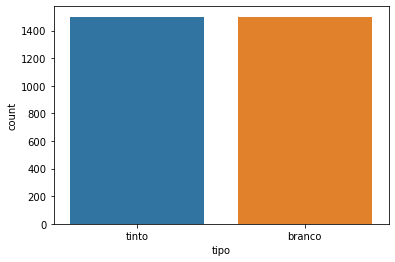

In [10]:
# Gráfico de colunas para a variável dependente tipo
sns.countplot(x='tipo', data=df)

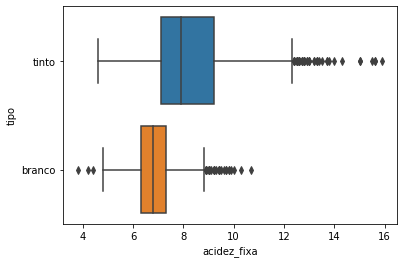

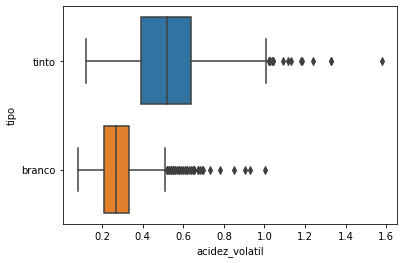

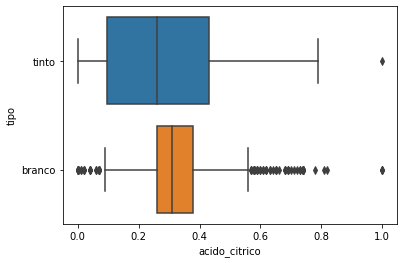

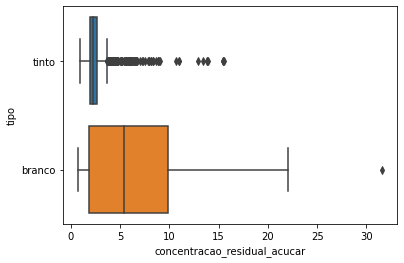

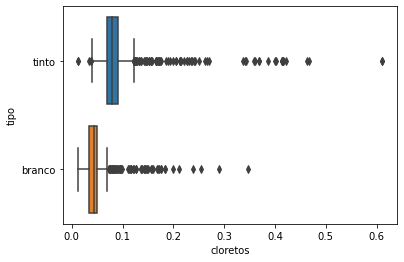

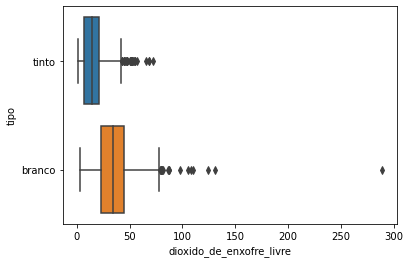

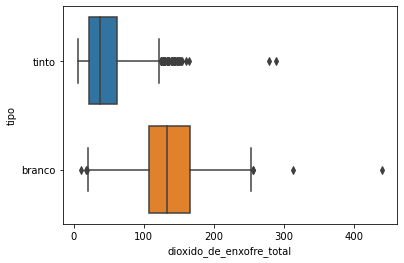

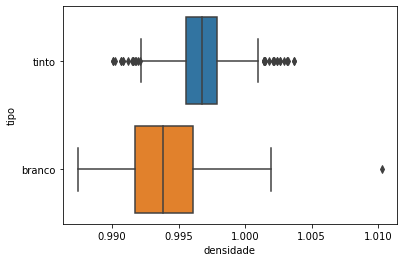

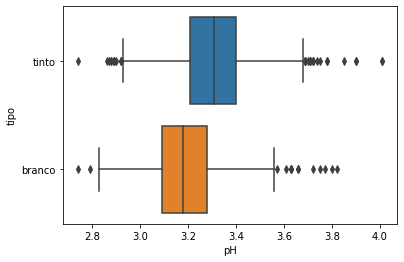

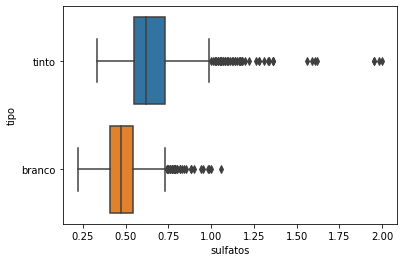

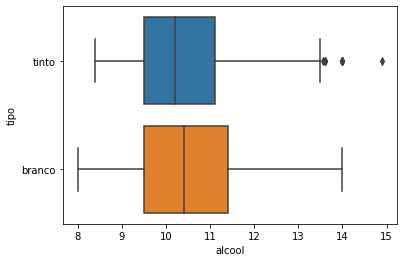

In [11]:
lista_colunas_num = df.select_dtypes(include=['float64']).columns.values
# Boxplots mostrando os valores para cada variável do tipo float64 de acordo com o tipo de vinho
for nome_coluna in lista_colunas_num:
    plt.figure()
    sns.boxplot(x=nome_coluna,y='tipo',data=df)

<AxesSubplot:xlabel='qualidade', ylabel='count'>

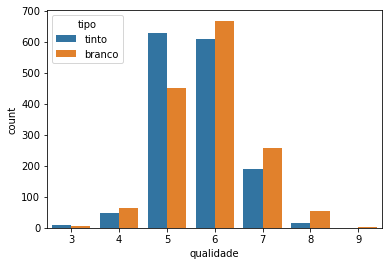

In [12]:
# Gráfico de colunas mostrando os valores da qualidade de acordo com o tipo de vinho
sns.countplot(x='qualidade', hue='tipo', data=df)

Percebe-se que a acidez, as quantidades dos cloretos e sulfatos, a densidade e o PH são geralmente maiores para vinhos tintos. Já a quantidade de dióxido de enxofre e a concentração residual de açucar são geralmente maiores para vinhos brancos. Além disso, percebe-se que os vinhos brancos têm mais qualidade que os vinhos tintos em geral.

## Preparação dos dados de treinamento

In [13]:
#Ajustando a varíavel dependente tipo: de valores binários para númericos
df.replace(to_replace={'tinto': 0, 'branco': 1}, inplace=True)

In [14]:
# Separando os rótulos
X = df.drop(axis=1, labels=['tipo']).values
y = df['tipo']

In [15]:
# Tarefa de classificação: Classificação de vinho do tipo ‘tinto’ ou ‘branco’

## Separação dos conjuntos de treino e teste

In [16]:
# Importando o pacote sklearn.model_selection para a divisão dos dados
from sklearn.model_selection import train_test_split

In [17]:
# Divisão preliminar dos dados em conjunto de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=103)

In [18]:
# Observando o número de linhas e colunas para os conjuntos de treino e teste
print('shapes:')
print("X_treino shape = ", X_treino.shape) 
print("X_teste shape = ", X_teste.shape) 
print("y_treino shape = ", y_treino.shape) 
print("y_teste shape = ", y_teste.shape)

shapes:
X_treino shape =  (2400, 12)
X_teste shape =  (600, 12)
y_treino shape =  (2400,)
y_teste shape =  (600,)


In [19]:
# Carregando o pacote para normalizar os dados
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

Para normalizar os dados foi usado o método z-score

In [21]:
# Normalização dos dados de treino e teste
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.fit_transform(X_teste)

## Treinamento do modelo

In [22]:
# Inicialização do classificador
from sklearn import svm

In [23]:
clf = svm.SVC(kernel='linear')

In [24]:
clf.fit(X_treino, y_treino)

SVC(kernel='linear')

## Avaliação do modelo

In [25]:
#Predições para o base de teste
y_pred = clf.predict(X_teste)

In [26]:
#Importação do módulo com as métricas para o cálculo das mesmas
from sklearn import metrics

In [41]:
# Cálculo da acurácia, da precisão e do recall
print("Acurácia: %0.3f" % (metrics.accuracy_score(y_teste, y_pred)) )
print("Precisão: %0.3f" % (metrics.precision_score(y_teste, y_pred)) )
print("Recall: %0.3f" % (metrics.recall_score(y_teste, y_pred)) )

Acurácia: 0.992
Precisão: 0.990
Recall: 0.993


#### Validação Cruzada

In [29]:
#Importação do pacote para a realização da validação cruzada
from sklearn.model_selection import cross_val_score

In [37]:
#Cálculo das métricas usando o método de validação cruzada
%%time
scores_acur = cross_val_score(clf, X, y, cv=5, scoring='accuracy', n_jobs=3)
scores_prec = cross_val_score(clf, X, y, cv=5, scoring='precision', n_jobs=3)
scores_rec = cross_val_score(clf, X, y, cv=5, scoring='recall', n_jobs=3)

Wall time: 20.7 s


In [42]:
print("Accuracy: %0.3f (+/- %0.2f)" % (scores_acur.mean(), scores_acur.std() * 2 ))
print("Accuracy: %0.3f (+/- %0.2f)" % (scores_prec.mean(), scores_prec.std() * 2 ))
print("Accuracy: %0.3f (+/- %0.2f)" % (scores_rec.mean(), scores_rec.std() * 2 ))

Accuracy: 0.984 (+/- 0.01)
Accuracy: 0.982 (+/- 0.01)
Accuracy: 0.987 (+/- 0.02)


Não houve melhora nas métricas de classificação usando o método de validação cruzada.

#### Grid Search

In [43]:
# #Importação do pacote para a uso do método Grid Search para otimizar parâmetros
from sklearn.model_selection import GridSearchCV

In [53]:
#Definindo os parâmetros que seram testados
parametros = {'kernel': ['rbf','linear','poly']}

In [54]:
clf_grid = svm.SVC()

In [55]:
gs = GridSearchCV(clf_grid, parametros, n_jobs=3)

In [57]:
# Gerando o modelo com o método Grid Search
%%time
gs.fit(X_treino, y_treino)

Wall time: 8.53 s


GridSearchCV(estimator=SVC(), n_jobs=3,
             param_grid={'kernel': ['rbf', 'linear', 'poly']})

In [58]:
# Observando os resultados
gs.cv_results_

{'mean_fit_time': array([0.08032217, 0.07225981, 0.10323   ]),
 'std_fit_time': array([0.01142257, 0.01323   , 0.02491306]),
 'mean_score_time': array([0.01179385, 0.00479856, 0.01229215]),
 'std_score_time': array([0.00159729, 0.0014696 , 0.00288655]),
 'param_kernel': masked_array(data=['rbf', 'linear', 'poly'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'rbf'}, {'kernel': 'linear'}, {'kernel': 'poly'}],
 'split0_test_score': array([0.99375   , 0.99583333, 0.99583333]),
 'split1_test_score': array([0.99375   , 0.99166667, 0.99166667]),
 'split2_test_score': array([0.9875    , 0.98541667, 0.9875    ]),
 'split3_test_score': array([0.99375, 0.9875 , 0.99375]),
 'split4_test_score': array([0.99583333, 0.99375   , 0.99166667]),
 'mean_test_score': array([0.99291667, 0.99083333, 0.99208333]),
 'std_test_score': array([0.00282597, 0.00386401, 0.00276385]),
 'rank_test_score': array([1, 3, 2])}

In [60]:
# Observando o valor médio de desempenho do melhor estimador
gs.best_score_

0.9929166666666667

In [61]:
# Observando a configuração de parâmetros que deu os melhores resultados nos dados de teste
gs.best_params_

{'kernel': 'rbf'}

Percebe-se que a mudança do parâmetro kernel de linear para rbf também não trouxe uma melhora significativa para resultados nos dados de teste. 